In [ ]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import filedialog,messagebox

<font size="5">Loading The Data</font>

In [54]:
df1 = pd.read_csv("D:\\ACM\\MGC-Project 1\\features_3_sec.csv")
print(df1.columns)
df2 = pd.read_csv("D:\\ACM\\MGC-Project 1\\features_30_sec.csv")
print(df2.columns)
df = pd.concat([df1, df2])
#df.info()

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [55]:
print(df.columns)

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [56]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


<font size ="5">Preprocessing</font>

In [57]:
#Converting 'label' to category and generate 'class_label'(this contains numerical code)
df['label'] = df['label'].astype('category')
df['class_label'] = df['label'].cat.codes

In [58]:
#copy of a dataframe 
df_copy = df.copy()

In [59]:
#removing column
df = df.drop('filename',axis=1)

In [61]:
#Creating a lookup_genre_name dictionary
lookup_genre_name = dict(zip(df.class_label.unique(), df.label.unique()))
print(lookup_genre_name)

{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [62]:
#removing columns
cols=list(df.columns)
cols.remove('label')
cols.remove('class_label')
subset_df = df[cols]
print(subset_df)

     length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0     66149          0.335406         0.091048  0.130405  0.003521   
1     66149          0.343065         0.086147  0.112699  0.001450   
2     66149          0.346815         0.092243  0.132003  0.004620   
3     66149          0.363639         0.086856  0.132565  0.002448   
4     66149          0.335579         0.088129  0.143289  0.001701   
..      ...               ...              ...       ...       ...   
995  661794          0.352063         0.080487  0.079486  0.000345   
996  661794          0.398687         0.075086  0.076458  0.000588   
997  661794          0.432142         0.075268  0.081651  0.000322   
998  661794          0.362485         0.091506  0.083860  0.001211   
999  661794          0.358401         0.085884  0.054454  0.000336   

     spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               1773.065032          167541.630869              1972.744388   
1

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10990 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   length                   10990 non-null  int64   
 1   chroma_stft_mean         10990 non-null  float64 
 2   chroma_stft_var          10990 non-null  float64 
 3   rms_mean                 10990 non-null  float64 
 4   rms_var                  10990 non-null  float64 
 5   spectral_centroid_mean   10990 non-null  float64 
 6   spectral_centroid_var    10990 non-null  float64 
 7   spectral_bandwidth_mean  10990 non-null  float64 
 8   spectral_bandwidth_var   10990 non-null  float64 
 9   rolloff_mean             10990 non-null  float64 
 10  rolloff_var              10990 non-null  float64 
 11  zero_crossing_rate_mean  10990 non-null  float64 
 12  zero_crossing_rate_var   10990 non-null  float64 
 13  harmony_mean             10990 non-null  float64 
 14  harmony_var  

<font size="5">Spliting Data For Training and Testing</font>

In [66]:
from sklearn.model_selection import train_test_split
X = df.drop(['label','class_label'],axis=1)
y = df['class_label']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
print(X)

     length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0     66149          0.335406         0.091048  0.130405  0.003521   
1     66149          0.343065         0.086147  0.112699  0.001450   
2     66149          0.346815         0.092243  0.132003  0.004620   
3     66149          0.363639         0.086856  0.132565  0.002448   
4     66149          0.335579         0.088129  0.143289  0.001701   
..      ...               ...              ...       ...       ...   
995  661794          0.352063         0.080487  0.079486  0.000345   
996  661794          0.398687         0.075086  0.076458  0.000588   
997  661794          0.432142         0.075268  0.081651  0.000322   
998  661794          0.362485         0.091506  0.083860  0.001211   
999  661794          0.358401         0.085884  0.054454  0.000336   

     spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               1773.065032          167541.630869              1972.744388   
1

<font size = "5">Standardization </font>

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#scaling must be applied to the testing set that we computed for training set
X_test_scaled = scaler.transform(X_test)

<font size ="5">Feature Importance Using Random Forest Classifier</fon>

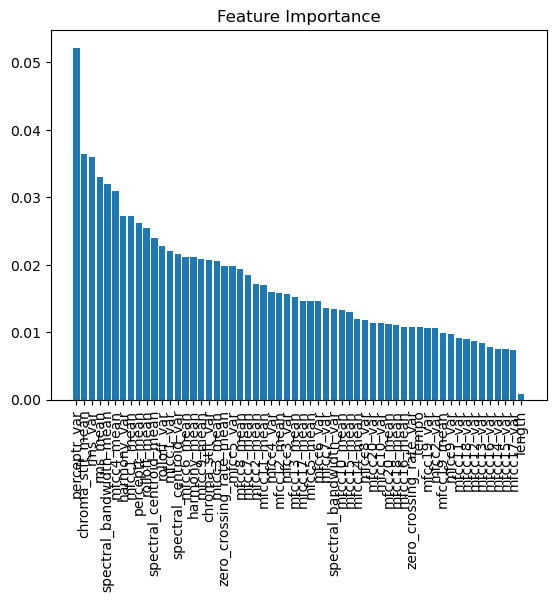

In [68]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
clf.fit(X_train_scaled, y_train)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

<font size ="5">K Neighbors Classifier</font>

<font size ="3">Evaluating Models Performance and Output the Classification metrics,Accuracy and Best Parameter Value</font>

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
#Hyperparameter tuning
param_grid = {'n_neighbors': range(1, 59)} 
#Model fitting 
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
y_pred = grid_search.predict(X_test_scaled)
#Evaluating the model
#classification_report
class_report =  classification_report(y_test, y_pred)
print("metrics:", class_report)

#accuracy
accuracy = accuracy_score(y_test,y_pred)

print("Accuracy:" , accuracy)

print("Best Parameters:", grid_search.best_params_)


metrics:               precision    recall  f1-score   support

           0       0.92      0.91      0.92       279
           1       0.91      0.94      0.92       286
           2       0.80      0.84      0.82       253
           3       0.87      0.90      0.88       293
           4       0.92      0.94      0.93       260
           5       0.92      0.87      0.89       290
           6       0.99      0.95      0.97       258
           7       0.91      0.91      0.91       255
           8       0.90      0.91      0.90       282
           9       0.88      0.84      0.86       292

    accuracy                           0.90      2748
   macro avg       0.90      0.90      0.90      2748
weighted avg       0.90      0.90      0.90      2748

Accuracy: 0.9002911208151383
Best Parameters: {'n_neighbors': 1}


<font size ="5">Function To Predict Genre For Given Music File</font>

In [76]:
def predict_genre_by_filename(filename, df_copy, model, scaler):
    import os

    # Extract the base name of the file to match the dataset
    base_filename = os.path.basename(filename)
    
    # Ensure exact match, including case and whitespace stripping
    features = df_copy[df_copy['filename'].str.strip().str.lower() == base_filename.strip().lower()]
    
    if features.empty:
        return "File not found in the dataset."
    
    features = features.drop(['filename', 'label','class_label'], axis=1)
    features_scaled = scaler.transform(features)
    prediction = clf.predict(features_scaled)
    predicted_genre = lookup_genre_name[prediction[0]]

    return predicted_genre
    
filename ="D:\\ACM\\MGC-Project 1\\genres_original\\blues\\blues.00000.wav"
predicted_genre = predict_genre_by_filename(filename, df_copy, clf, scaler)
print(f"The predicted genre is: {predicted_genre}")

The predicted genre is: blues


<font size ="5"> GUI using Tkinter </font>

In [77]:
def open_file():
    filename = filedialog.askopenfilename(title="Select a music file")
    if filename:
        entry_filename.delete(0, tk.END)
        entry_filename.insert(0, filename)
def predict():
    filename = entry_filename.get()
    if not filename:
        messagebox.showerror("Error", "Please select a file")
        return
    
    predicted_genre = predict_genre_by_filename(filename, df_copy, clf, scaler)
    label_result.config(text=f"Predicted Genre: {predicted_genre}")

root = tk.Tk()
root.title("Music Genre Prediction")

frame = tk.Frame(root)
frame.pack(pady=20)

label = tk.Label(frame, text="Select Audio File:")
label.grid(row=0, column=0, padx=10, pady=10)

entry_filename = tk.Entry(frame, width=50)
entry_filename.grid(row=0, column=1, padx=10, pady=10)

button_browse = tk.Button(frame, text="Browse", command=open_file)
button_browse.grid(row=0, column=2, padx=10, pady=10)

button_predict = tk.Button(frame, text="Predict Genre", command=predict)
button_predict.grid(row=1, column=1, pady=10)

label_result = tk.Label(frame, text="Predicted Genre: ")
label_result.grid(row=2, column=1, pady=10)

root.mainloop()